In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyro.distributions as dist
from torch import Tensor
from torch.autograd import Variable

In [2]:
mu = Variable(Tensor([0.]))
sigma = Variable(Tensor([1.23]))
get_w = lambda: dist.normal(mu, sigma).data[0]
get_b = lambda: dist.normal(mu, sigma).data[0]

In [54]:
x = np.linspace(0, 10, 100)
Y = []
for _ in range(100):
    w, b = get_w(), get_b()
    y = w*x + b
    Y.append(y)

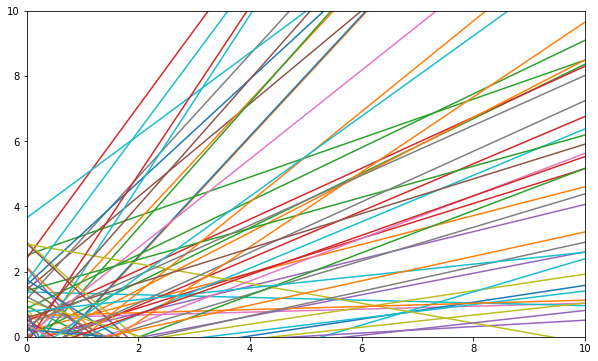

In [57]:
plt.figure(figsize=(10, 6))
plt.ylim(0, 10)
plt.xlim(0, 10)
for y in Y:
    plt.plot(x, y)

In [21]:
import numpy as np

# ! i think this works?

# Define mean, covariance matrix, and no. of samples required
mean = np.array([1, 2, 3])
cov = np.diag([1, 2, 3])
Ndraws = 1000

# Do factorisation (can store this and use it again later)
L = np.linalg.cholesky(cov)

# Get 3*Ndraws Gaussian random variables (mean=0, variance=1)
norm = np.random.normal(size=Ndraws*3).reshape(3, Ndraws)

# Construct final set of random numbers (with correct mean)
rand = mean + np.dot(L, norm).T

In [19]:
# tau = np.array([1.23, 2.34])
# omega = np.array([[1, .8], [.8, 1]])
cov = np.array([[3, 4], [1, 5]])
L = np.linalg.cholesky(cov)
mu = np.array([[0., 0.]])

In [29]:
mu + (L @ np.random.randn(2, 1)).T

array([[0.75442141, 1.62644463]])

In [21]:
mu + L.dot()

array([[ 0.44354548,  0.44354548],
       [-0.96379904, -0.96379904]])

In [4]:
get_w_and_b = lambda: mu + np.diag(tau) * np.linalg.cholesky(omega) * np.random.randn()

# Define some crazy function

In [85]:
y_true = np.sin(x)**2 - np.abs(x - 3) + 7
noisy_y_true = y_true + .5 * np.random.randn(len(y_true))

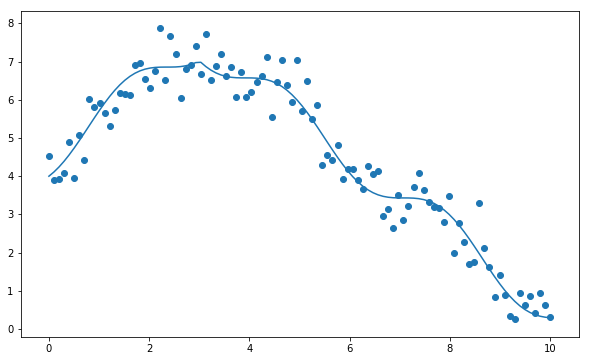

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_true)
plt.scatter(x, noisy_y_true)

In [87]:
Y = []
for _ in range(100):
    w, b = get_w(), get_b()
    y = w*(x**2) + b
    Y.append(y)

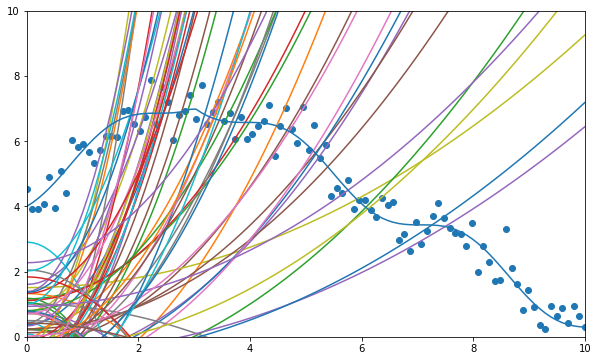

In [89]:
plt.figure(figsize=(10, 6))
plt.ylim(0, 10)
plt.xlim(0, 10)
for y in Y:
    plt.plot(x, y)
plt.plot(x, y_true)
plt.scatter(x, noisy_y_true)

In [102]:
# import pandas as pd

# df = pd.DataFrame({'noisy_y_true': noisy_y_true}, index=x)

data = {xx: yy for xx, yy in zip(x, noisy_y_true)}

In [127]:
# rbf kernel
def rbf(point, neighbor, sigma=.5):
    return np.exp(-(point - neighbor)**2 / (2 * sigma**2))


def query(point, data=data, kernel=rbf):
    weighted_sum = 0
    total_weight = 0
    for x, y in data.items():
        if x != point:
            weight = kernel(point=point, neighbor=x)
            weighted_sum += weight * y
            total_weight += weight
    return weighted_sum / total_weight

In [128]:
y_approx = [query(xx) for xx in x]

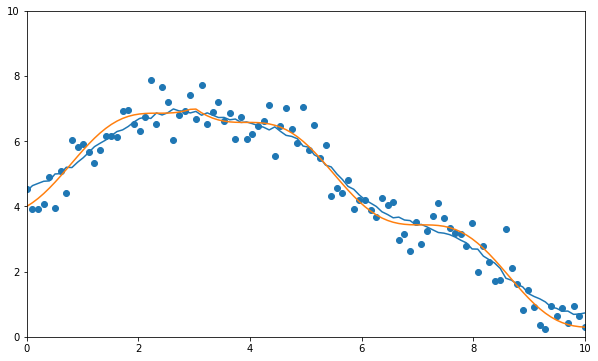

In [129]:
plt.figure(figsize=(10, 6))
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.plot(x, y_approx)
plt.plot(x, y_true)
plt.scatter(x, noisy_y_true)

In [141]:
np.tile(np.array([[100, 100, 100, 100]])

array([[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100]])

In [188]:
# projections = np.array([x, np.sin(x), np.cos(x), np.tanh(x)]).T
projections = np.array([x, np.abs(x-2), np.abs(x-5), x-20]).T

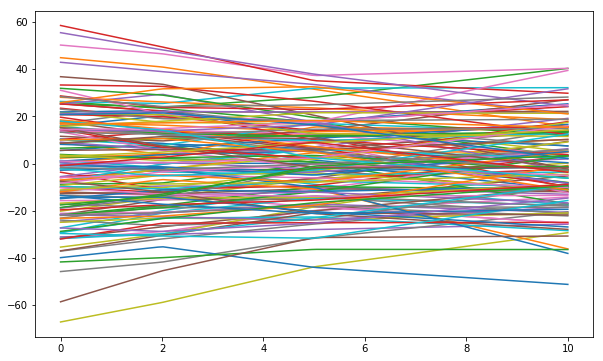

In [189]:
plt.figure(figsize=(10, 6))
# plt.ylim(0, 10)
# plt.xlim(0, 10)
for _ in range(145):
    y = projections @ np.random.randn(4)
    plt.plot(x, y)